In [1]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt

In [2]:
torch.manual_seed(1)

In [3]:
x = np.expand_dims(np.arange(-1.5, 1.5, 0.01),1) 
print(x.shape)
y = np.sinc(5*x)
print(y.shape)

(300, 1)
(300, 1)


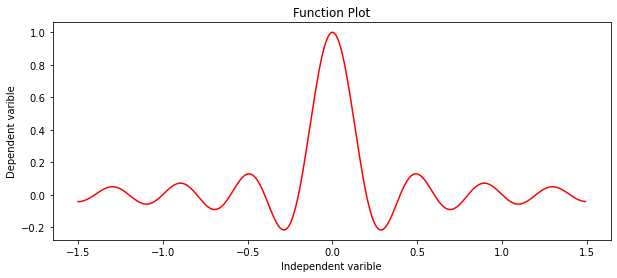

In [4]:
x, y = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)
plt.figure(figsize=(10,4))
plt.plot(x, y, color = "red")
plt.title('Function Plot')
plt.xlabel('Independent varible')
plt.ylabel('Dependent varible')
plt.show()

In [5]:
def model_train(model,x,y):
    max_epoch = 20000
    epoch_arr,loss_arr=[],[]
    not_converged = True
    epoch = 0
    while not_converged:
        epoch += 1
        prediction = model(x)  
        loss = loss_func(prediction, y)
        optimizer.zero_grad() #clear gradients for next epoch
        loss.backward() #compute gradients using back propogation
        optimizer.step() 
        epoch_arr.append(epoch)
        loss_arr.append(loss.detach().numpy())
        
        if epoch % 500 == 0: 
            print(f'epoch: {epoch}, loss = {loss.item():.4f}')
                
        if epoch == max_epoch:
                print("Max Epoch Reached")
                not_converged = False

        elif (epoch > 5) and  (loss_arr[-1] < 0.001):
            if abs(loss_arr[-3] - loss_arr[-2]) < 1.0e-05 and abs(loss_arr[-2] - loss_arr[-1]) < 1.0e-05:
                print("Convergence reached for loss:",loss_arr[-1])
                not_converged = False
                
    return epoch_arr,loss_arr,prediction

In [6]:
m1 =    torch.nn.Sequential(
        torch.nn.Linear(1, 5),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(5, 10),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(10, 10),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(10, 10),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(10, 10),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(10, 10),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(10, 5),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(5, 1),
    )

optimizer = torch.optim.RMSprop(m1.parameters(), lr = 1e-3, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss()  # mean squared loss
pytorch_total_params = sum(p.numel() for p in m1.parameters())
print(pytorch_total_params)

571


In [7]:
m1_epoch_arr, m1_loss_arr, m1_prediction = model_train(m1, x, y)

epoch: 500, loss = 0.0050
epoch: 1000, loss = 0.0028
epoch: 1500, loss = 0.0024
epoch: 2000, loss = 0.0025
epoch: 2500, loss = 0.0025
epoch: 3000, loss = 0.0024
epoch: 3500, loss = 0.0023
epoch: 4000, loss = 0.0024
epoch: 4500, loss = 0.0023
epoch: 5000, loss = 0.0024
epoch: 5500, loss = 0.0022
epoch: 6000, loss = 0.0021
epoch: 6500, loss = 0.0020
epoch: 7000, loss = 0.0021
epoch: 7500, loss = 0.0017
epoch: 8000, loss = 0.0018
epoch: 8500, loss = 0.0021
epoch: 9000, loss = 0.0015
epoch: 9500, loss = 0.0016
epoch: 10000, loss = 0.0015
epoch: 10500, loss = 0.0017
epoch: 11000, loss = 0.0014
epoch: 11500, loss = 0.0013
epoch: 12000, loss = 0.0015
epoch: 12500, loss = 0.0015
epoch: 13000, loss = 0.0017
epoch: 13500, loss = 0.0013
epoch: 14000, loss = 0.0013
epoch: 14500, loss = 0.0013
epoch: 15000, loss = 0.0012
epoch: 15500, loss = 0.0017
epoch: 16000, loss = 0.0013
epoch: 16500, loss = 0.0015
Convergence reached for loss: 0.0009986206


In [8]:
m2 =    torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(10, 18),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(18, 15),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(15, 4),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(4, 1),
    )
    
optimizer = torch.optim.RMSprop(m2.parameters(), lr = 1e-3, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss() 
pytorch_total_params = sum(p.numel() for p in m2.parameters())
print(pytorch_total_params)

572


In [9]:
m2_epoch_arr, m2_loss_arr, m2_prediction = model_train(m2, x, y)

epoch: 500, loss = 0.0040
epoch: 1000, loss = 0.0026
epoch: 1500, loss = 0.0023
epoch: 2000, loss = 0.0021
epoch: 2500, loss = 0.0018
epoch: 3000, loss = 0.0016
epoch: 3500, loss = 0.0015
epoch: 4000, loss = 0.0014
epoch: 4500, loss = 0.0013
epoch: 5000, loss = 0.0013
epoch: 5500, loss = 0.0012
epoch: 6000, loss = 0.0013
epoch: 6500, loss = 0.0012
epoch: 7000, loss = 0.0011
epoch: 7500, loss = 0.0011
epoch: 8000, loss = 0.0011
epoch: 8500, loss = 0.0012
epoch: 9000, loss = 0.0012
epoch: 9500, loss = 0.0012
Convergence reached for loss: 0.000999174


In [10]:
m3 =    torch.nn.Sequential(
        torch.nn.Linear(1, 190),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(190, 1),
    )
optimizer = torch.optim.RMSprop(m3.parameters(), lr = 1e-3, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss()
pytorch_total_params = sum(p.numel() for p in m3.parameters())
print(pytorch_total_params)

571


In [11]:
m3_epoch_arr, m3_loss_arr, m3_prediction = model_train(m3, x, y)

epoch: 500, loss = 0.0308
epoch: 1000, loss = 0.0220
epoch: 1500, loss = 0.0169
epoch: 2000, loss = 0.0138
epoch: 2500, loss = 0.0116
epoch: 3000, loss = 0.0101
epoch: 3500, loss = 0.0090
epoch: 4000, loss = 0.0082
epoch: 4500, loss = 0.0076
epoch: 5000, loss = 0.0071
epoch: 5500, loss = 0.0068
epoch: 6000, loss = 0.0065
epoch: 6500, loss = 0.0063
epoch: 7000, loss = 0.0060
epoch: 7500, loss = 0.0058
epoch: 8000, loss = 0.0057
epoch: 8500, loss = 0.0056
epoch: 9000, loss = 0.0054
epoch: 9500, loss = 0.0053
epoch: 10000, loss = 0.0053
epoch: 10500, loss = 0.0051
epoch: 11000, loss = 0.0049
epoch: 11500, loss = 0.0049
epoch: 12000, loss = 0.0049
epoch: 12500, loss = 0.0048
epoch: 13000, loss = 0.0048
epoch: 13500, loss = 0.0047
epoch: 14000, loss = 0.0046
epoch: 14500, loss = 0.0046
epoch: 15000, loss = 0.0045
epoch: 15500, loss = 0.0045
epoch: 16000, loss = 0.0044
epoch: 16500, loss = 0.0043
epoch: 17000, loss = 0.0043
epoch: 17500, loss = 0.0043
epoch: 18000, loss = 0.0042
epoch: 18500

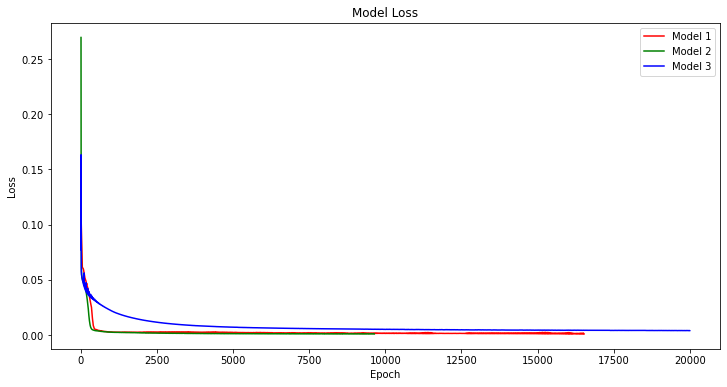

In [12]:
plt.figure(figsize=(12,6))
plt.plot(m1_epoch_arr, m1_loss_arr, color = "r")
plt.plot(m2_epoch_arr, m2_loss_arr, color = "g")
plt.plot(m3_epoch_arr, m3_loss_arr, color = "b")
plt.title('Model Loss')
plt.legend(['Model 1', 'Model 2','Model 3'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

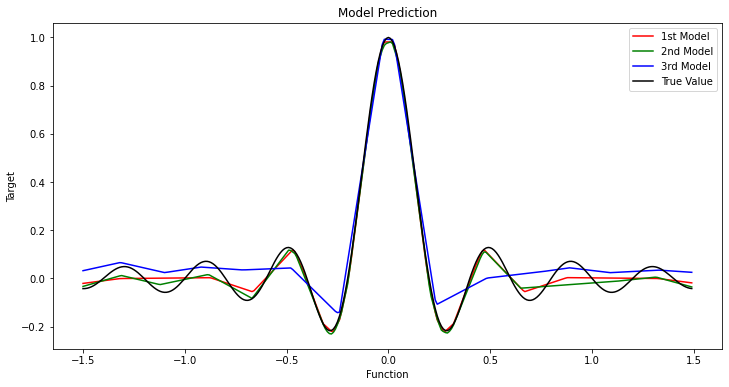

In [13]:
plt.figure(figsize=(12,6))
plt.plot(x, m1_prediction.data, color="r", label = '1st Model')
plt.plot(x, m2_prediction.data, color="g", label = '2nd Model')
plt.plot(x, m3_prediction.data, color="b", label = '3rd Model')
plt.plot(x, y, color="black", label = 'True Value')
plt.title('Model Prediction')
plt.xlabel('Function')
plt.ylabel('Target')
plt.legend()
plt.show()

In [14]:
x = np.expand_dims(np.arange(-1.5, 1.5, 0.01),1) 
print(x.shape)
y = np.sign(np.sin(5*np.pi*x))
print(y.shape)

(300, 1)
(300, 1)


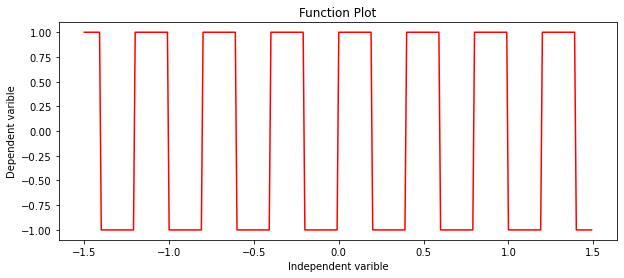

In [15]:
x, y = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)
plt.figure(figsize=(10,4))
plt.plot(x, y, color = "red")

plt.title('Function Plot')
plt.xlabel('Independent varible')
plt.ylabel('Dependent varible')
plt.show()

In [16]:
optimizer = torch.optim.Adam(m1.parameters(), lr = 1e-3, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss()  # mean squared loss
m1_epoch_arr, m1_loss_arr, m1_prediction = model_train(m1, x, y)

epoch: 500, loss = 0.4039
epoch: 1000, loss = 0.1216
epoch: 1500, loss = 0.1006
epoch: 2000, loss = 0.0834
epoch: 2500, loss = 0.0773
epoch: 3000, loss = 0.0723
epoch: 3500, loss = 0.0699
epoch: 4000, loss = 0.0663
epoch: 4500, loss = 0.0648
epoch: 5000, loss = 0.0637
epoch: 5500, loss = 0.0650
epoch: 6000, loss = 0.0596
epoch: 6500, loss = 0.0591
epoch: 7000, loss = 0.0609
epoch: 7500, loss = 0.0589
epoch: 8000, loss = 0.0597
epoch: 8500, loss = 0.0550
epoch: 9000, loss = 0.0542
epoch: 9500, loss = 0.0539
epoch: 10000, loss = 0.0532
epoch: 10500, loss = 0.0548
epoch: 11000, loss = 0.0528
epoch: 11500, loss = 0.0644
epoch: 12000, loss = 0.0516
epoch: 12500, loss = 0.0520
epoch: 13000, loss = 0.0512
epoch: 13500, loss = 0.0510
epoch: 14000, loss = 0.0520
epoch: 14500, loss = 0.0499
epoch: 15000, loss = 0.0504
epoch: 15500, loss = 0.0507
epoch: 16000, loss = 0.0497
epoch: 16500, loss = 0.0509
epoch: 17000, loss = 0.0518
epoch: 17500, loss = 0.0488
epoch: 18000, loss = 0.0506
epoch: 18500

In [17]:
optimizer = torch.optim.Adam(m2.parameters(), lr = 1e-3, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss() 
m2_epoch_arr, m2_loss_arr, m2_prediction = model_train(m2, x, y)

epoch: 500, loss = 0.4290
epoch: 1000, loss = 0.2762
epoch: 1500, loss = 0.2502
epoch: 2000, loss = 0.2400
epoch: 2500, loss = 0.2370
epoch: 3000, loss = 0.2288
epoch: 3500, loss = 0.2242
epoch: 4000, loss = 0.2110
epoch: 4500, loss = 0.2069
epoch: 5000, loss = 0.2011
epoch: 5500, loss = 0.1969
epoch: 6000, loss = 0.1949
epoch: 6500, loss = 0.1937
epoch: 7000, loss = 0.1918
epoch: 7500, loss = 0.1978
epoch: 8000, loss = 0.1910
epoch: 8500, loss = 0.1884
epoch: 9000, loss = 0.1877
epoch: 9500, loss = 0.1869
epoch: 10000, loss = 0.1867
epoch: 10500, loss = 0.1875
epoch: 11000, loss = 0.1850
epoch: 11500, loss = 0.1876
epoch: 12000, loss = 0.1838
epoch: 12500, loss = 0.1836
epoch: 13000, loss = 0.1845
epoch: 13500, loss = 0.1846
epoch: 14000, loss = 0.1826
epoch: 14500, loss = 0.1823
epoch: 15000, loss = 0.1820
epoch: 15500, loss = 0.1820
epoch: 16000, loss = 0.1874
epoch: 16500, loss = 0.1815
epoch: 17000, loss = 0.1814
epoch: 17500, loss = 0.1810
epoch: 18000, loss = 0.1809
epoch: 18500

In [18]:
optimizer = torch.optim.Adam(m3.parameters(), lr = 1e-3, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss()
m3_epoch_arr, m3_loss_arr, m3_prediction = model_train(m3, x, y)

epoch: 500, loss = 0.8472
epoch: 1000, loss = 0.7586
epoch: 1500, loss = 0.6748
epoch: 2000, loss = 0.5949
epoch: 2500, loss = 0.5245
epoch: 3000, loss = 0.4729
epoch: 3500, loss = 0.4380
epoch: 4000, loss = 0.4135
epoch: 4500, loss = 0.3964
epoch: 5000, loss = 0.3845
epoch: 5500, loss = 0.3758
epoch: 6000, loss = 0.3694
epoch: 6500, loss = 0.3647
epoch: 7000, loss = 0.3609
epoch: 7500, loss = 0.3578
epoch: 8000, loss = 0.3554
epoch: 8500, loss = 0.3530
epoch: 9000, loss = 0.3510
epoch: 9500, loss = 0.3493
epoch: 10000, loss = 0.3478
epoch: 10500, loss = 0.3467
epoch: 11000, loss = 0.3455
epoch: 11500, loss = 0.3441
epoch: 12000, loss = 0.3424
epoch: 12500, loss = 0.3410
epoch: 13000, loss = 0.3399
epoch: 13500, loss = 0.3389
epoch: 14000, loss = 0.3380
epoch: 14500, loss = 0.3370
epoch: 15000, loss = 0.3361
epoch: 15500, loss = 0.3354
epoch: 16000, loss = 0.3352
epoch: 16500, loss = 0.3336
epoch: 17000, loss = 0.3330
epoch: 17500, loss = 0.3322
epoch: 18000, loss = 0.3316
epoch: 18500

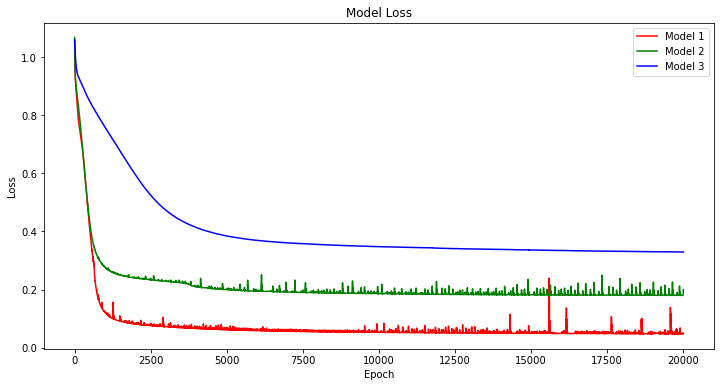

In [19]:
plt.figure(figsize=(12,6))
plt.plot(m1_epoch_arr, m1_loss_arr, color = "r")
plt.plot(m2_epoch_arr, m2_loss_arr, color = "g")
plt.plot(m3_epoch_arr, m3_loss_arr, color = "b")
plt.title('Model Loss')
plt.legend(['Model 1', 'Model 2','Model 3'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

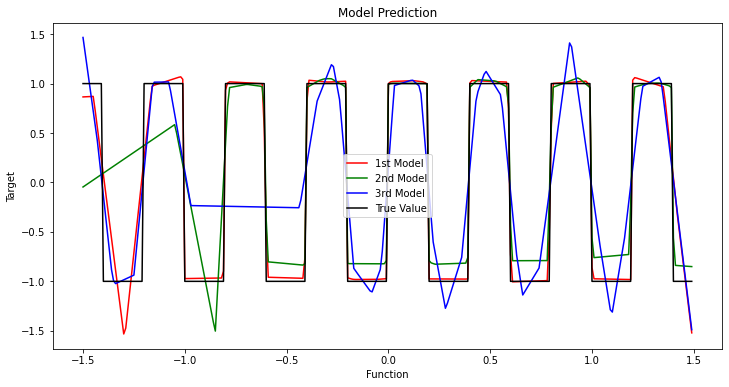

In [20]:
plt.figure(figsize=(12,6))
plt.plot(x, m1_prediction.data, color="r", label = '1st Model')
plt.plot(x, m2_prediction.data, color="g", label = '2nd Model')
plt.plot(x, m3_prediction.data, color="b", label = '3rd Model')
plt.plot(x, y, color="black", label = 'True Value')
plt.title('Model Prediction')
plt.xlabel('Function')
plt.ylabel('Target')
plt.legend()
plt.show()